In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


import keras.backend as K
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [32]:
df = pd.read_csv('./data/GOOGL.csv')

In [48]:
df['Date'] = pd.to_datetime(df['Date'])
print(type(df.loc[0, 'Date']))

<class 'pandas.tslib.Timestamp'>


In [50]:
df = df.set_index('Date')

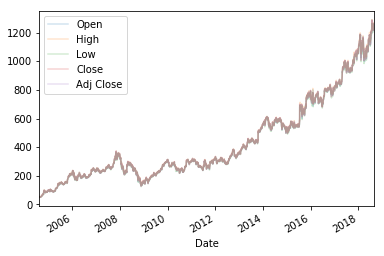

In [51]:
df.drop('Volume', axis=1).plot(alpha=0.2)

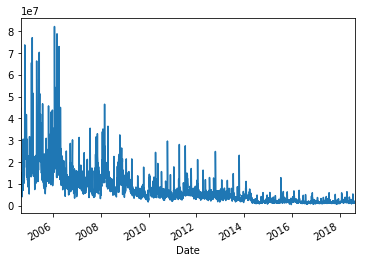

In [52]:
df['Volume'].plot()

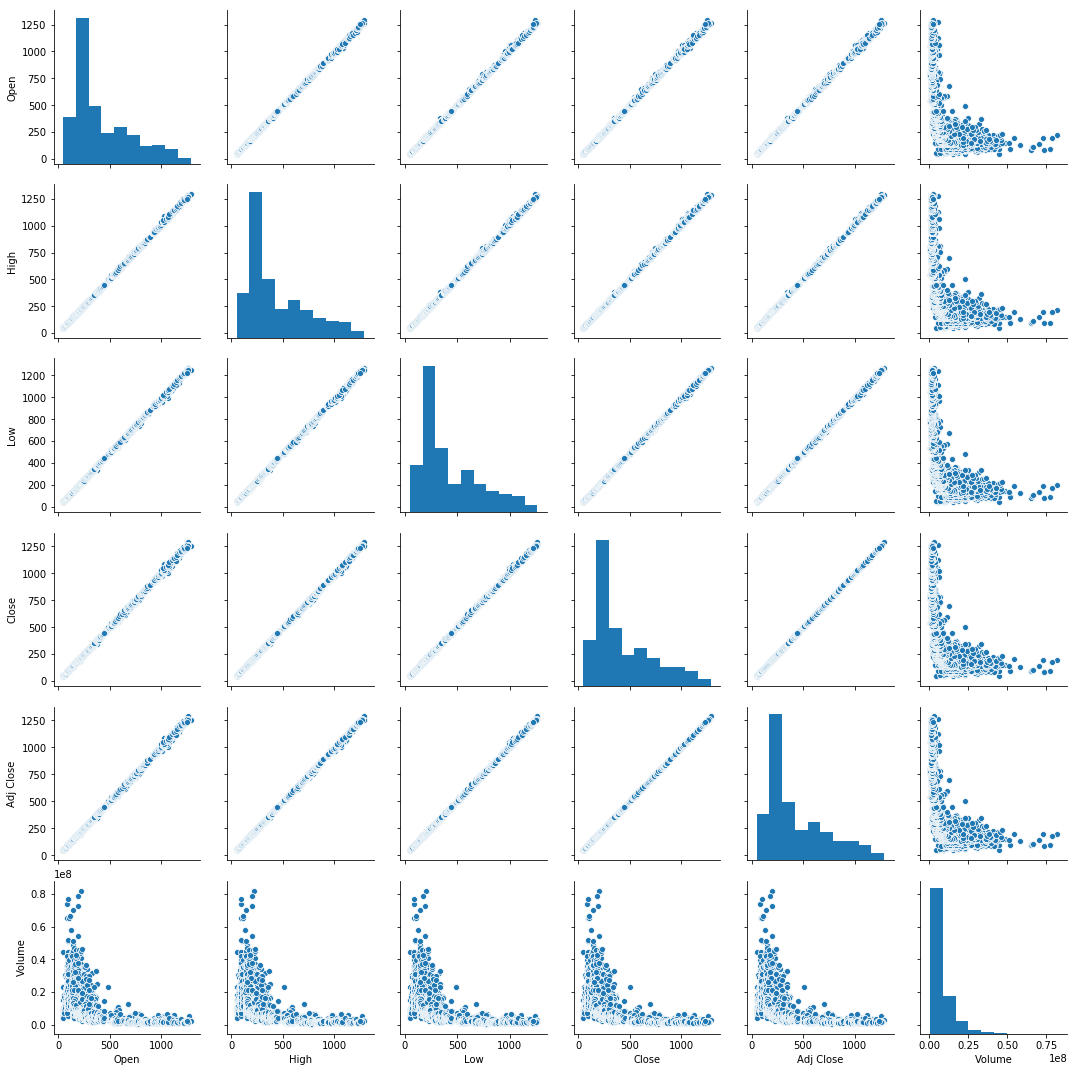

In [34]:
sns.pairplot(df)

In [70]:
# split the data into test and test set
split_date = pd.Timestamp('01-01-2018')
train_df = df.loc[:split_date]
test_df = df.loc[split_date:]

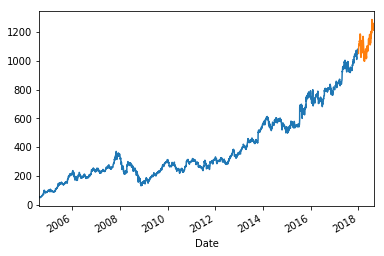

In [71]:
ax = train_df['Open'].plot()
test_df['Open'].plot(ax=ax)

In [72]:
# scale the data
sc = MinMaxScaler()
train = sc.fit_transform(train_df)
test = sc.transform(test_df)

In [93]:
X_train = train[:-1]
y_train = train[1:, 3]

X_test = test[:-1]
y_test = test[1:, 3]

In [94]:
print(X_train.shape)
print(y_train.shape)

(3365, 6)
(3365,)


In [107]:
def build_fc():
    model = Sequential()
    model.add(Dense(10, input_dim=6, activation='relu'))
    model.add(Dense(1))
    
    model.summary()
    return model
    
    
K.clear_session()
model = build_fc()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [112]:
model_path='./models/fc.hdf5'
early_stopping = EarlyStopping(monitor='loss', patience=1, verbose=1)
checkpoint = ModelCheckpoint(model_path, monitor='loss', save_best_only=True, verbose=1)

model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(X_train, y_train, epochs=200,
          batch_size=2, verbose=1, callbacks=[early_stopping, checkpoint])

Epoch 1/200
3365/3365 [==============================] - 3s - loss: 7.0553e-05     
Epoch 2/200
3365/3365 [==============================] - 3s - loss: 6.9258e-05     
Epoch 3/200
3365/3365 [==============================] - 2s - loss: 6.8036e-05     
Epoch 4/200
3365/3365 [==============================] - 2s - loss: 6.7868e-05     
Epoch 5/200
3365/3365 [==============================] - 2s - loss: 6.7934e-05     
Epoch 6/200
3365/3365 [==============================] - 3s - loss: 6.9405e-05     
Epoch 00005: early stopping


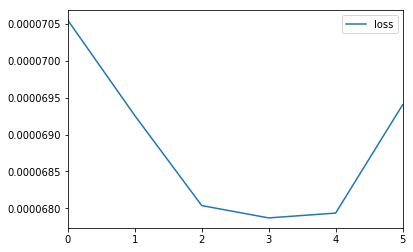

In [121]:
result_df = pd.DataFrame(hist.history)
result_df.plot()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


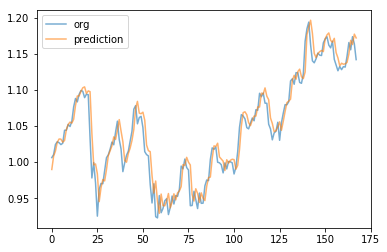

In [131]:
K.clear_session()
model = build_fc()
model.load_weights(model_path)
y_pred = model.predict(X_test)
plt.plot(y_test, alpha=0.6, label='org')
plt.plot(y_pred, alpha=0.6, label='prediction')
plt.legend()

In [170]:
def build_rnn_1to1():
    model = Sequential()
    model.add(LSTM(10, input_shape=(1, 6), return_sequences=True))
    model.add(LSTM(5))
    model.add(Dense(1))
    return model

X_train_lstm = X_train.reshape(-1, 1, 6)
X_test_lstm = X_test.reshape(-1, 1, 6)

In [171]:
model_path_lstm='./models/lstm_1to1.hdf5'

In [173]:
K.clear_session()

model = build_rnn_1to1()

model.summary()

model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-4))


checkpoint = ModelCheckpoint(model_path_lstm, monitor='loss', save_best_only=True, verbose=1)


history = model.fit(X_train_lstm, y_train, epochs=200,
         batch_size=1, callbacks=[early_stopping, checkpoint])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 10)             680       
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 320       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 1,006
Trainable params: 1,006
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
3365/3365 [==============================] - 18s - loss: 0.0434    
Epoch 2/200
3365/3365 [==============================] - 19s - loss: 0.0014    
Epoch 3/200
3365/3365 [==============================] - 21s - loss: 1.2986e-04    
Epoch 4/200
3365/3365 [==============================] - 20s - loss: 1.1869e-04    
Epoch 5/200
3365/3365 [==============================] - 21s - loss: 1.1446e

3365/3365 [==============================] - 19s - loss: 5.1798e-05    
Epoch 32/200
3365/3365 [==============================] - 19s - loss: 5.1334e-05    
Epoch 33/200
3365/3365 [==============================] - 20s - loss: 5.0549e-05    
Epoch 34/200
3365/3365 [==============================] - 19s - loss: 5.0528e-05    
Epoch 35/200
3365/3365 [==============================] - 19s - loss: 4.9497e-05    
Epoch 36/200
3365/3365 [==============================] - 19s - loss: 4.9663e-05    
Epoch 37/200
3365/3365 [==============================] - 19s - loss: 4.9252e-05    
Epoch 38/200
3365/3365 [==============================] - 19s - loss: 4.8980e-05    
Epoch 39/200
3365/3365 [==============================] - 21s - loss: 4.8553e-05    
Epoch 40/200
3365/3365 [==============================] - 22s - loss: 4.8639e-05    
Epoch 41/200
3365/3365 [==============================] - 23s - loss: 4.8515e-05    
Epoch 42/200
3365/3365 [==============================] - 22s - loss: 4.7743e-

In [174]:
K.clear_session()

model = build_rnn_1to1()
model.load_weights(model_path_lstm)
y_pred = model.predict(X_test_lstm)

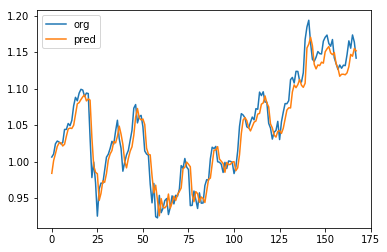

In [175]:
plt.plot(y_test, label='org')
plt.plot(y_pred, label='pred')
plt.legend()